<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/unsupervised/01_clustering/03_k_means_elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Algorytm K-średnich](#2)
4. [WCSS - Within-Cluster Sum-of-Squared](#3)
5. [Metoda "łokcia" - Elbow Method](#4)
6. [Wizualizacja klastrów](#5)



### <a name='0'></a> Import bibliotek

In [0]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(font_scale=1.3)

### <a name='1'></a> Wygenerowanie danych

In [2]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width=700, height=500, title='Algorytm K-średnich')

### <a name='2'></a> Algorytm K-średnich

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,4
1,-4.390559,-5.055149,0
2,-4.666211,-5.390080,0
3,3.022862,0.303769,1
4,3.322516,-0.676179,1


In [5]:
px.scatter(df, 'x1', 'x2', 'y_kmeans', width=700, height=500, title='Algorytm K-średnich - 5 klastrów')

### <a name='3'></a> WCSS - Within-Cluster Sum-of-Squared

In [6]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[23414.040458695992, 7734.886635126097, 4282.137026938608, 3851.084180933395, 3444.139414334606, 3050.442390031876, 2716.7209907246606, 2471.484350490175]


In [7]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index': 'clusters'})
wcss['clusters'] += 1
wcss.head()

,clusters,wcss
0,1,23414.040459
1,2,7734.886635
2,3,4282.137027
3,4,3851.084181
4,5,3444.139414


### <a name='4'></a> Metoda "łokcia" - Elbow Method

In [8]:
px.line(wcss, x='clusters', y='wcss', width=800, height=500, title='Within-Cluster-Sum of Squared Errors (WCSS)')

### <a name='5'></a> Wizualizacja klastrów

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'x1', 'x2', 'y_kmeans', width=700, height=500, title='Algorytm K-średnich - 3 klastry')

In [10]:
kmeans.cluster_centers_

array([[-4.67830594,  6.63353943],
       [-5.30241342, -5.40419963],
       [ 3.63034824,  1.80837659]])

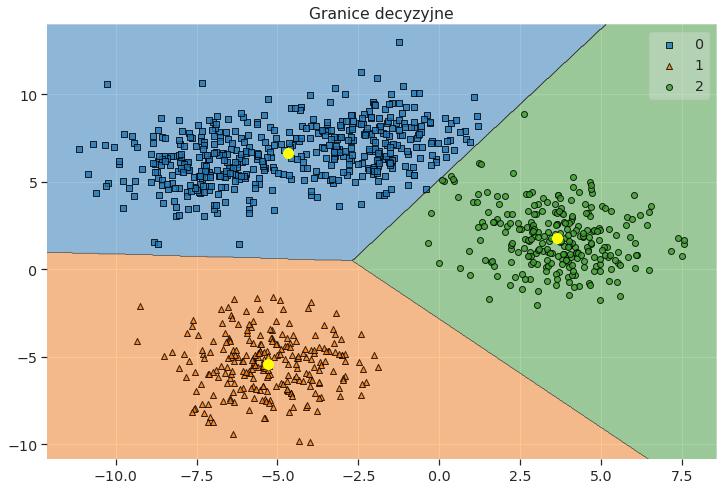

In [11]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12, 8))
plt.title('Granice decyzyjne')
plot_decision_regions(data, y_kmeans, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow')
plt.show()